In [1]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Mouse C3KO-RichLi snRNA
####  2023-05-19 by Yi Zhao (Texas Heart Institute, US)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Initiate  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
Ver <- '0'
Step <- 'PART14_Annotation_Epic'
Project <- '2023_neoc3ko_rli'

Code_dir <- paste0('/Volumes/shire/project/', Project, '/code/mouse_v', Ver, '/')

source(Sys.readlink(paste0(Code_dir, 'src/bioinformatics.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scRNAseq.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scATACseq.R')))
source(paste0(Code_dir, 'mouse_v', Ver, '.helper_functions.R'))

InitiateProject('Rivendell', Ver, Step, 'mouse', Project, 'shire')

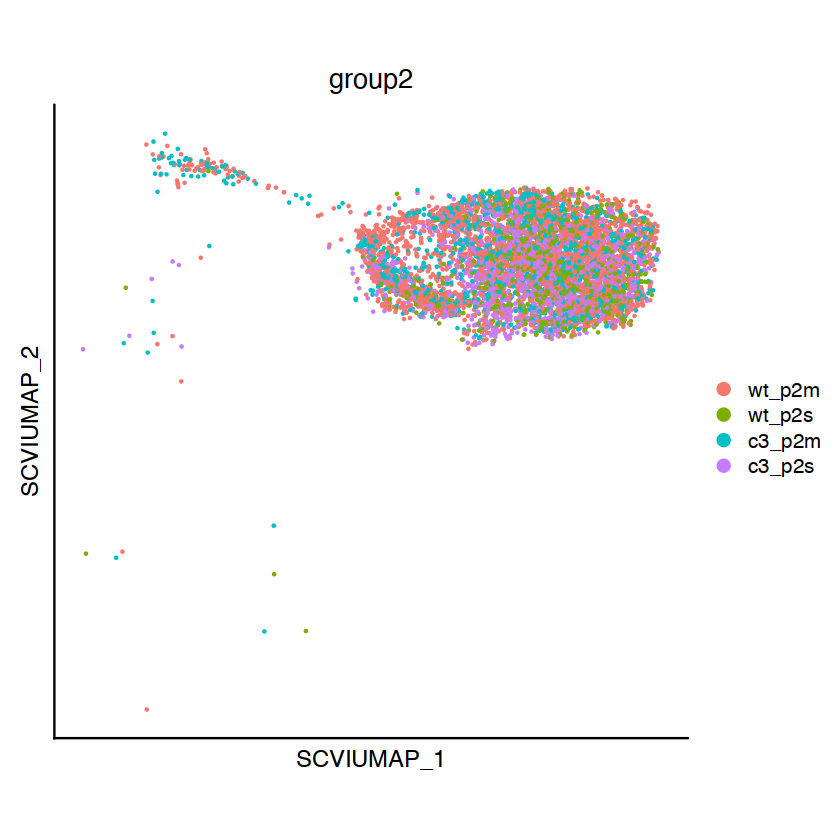

In [2]:
plan("multisession", workers = 8)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Load data  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
srt <- readRDS('integrated/PART10.annotated.srt.rds')
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Excitatory Neuron annotation  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
sub.srt <- srt[, srt$Cell_type %in% c('Epicardium')]
DimPlot2(sub.srt, group.by = 'group2')
mycol_sample <- mycol_10[1:4]

In [3]:
## Re-embed by scVI
sub.srt <- RunUMAP(sub.srt, reduction = 'scVI', dims = 1:50,
                  reduction.name = 'sub_scVI_umap', reduction.key = 'subSCVIUMAP_', verbose = FALSE)
sub.srt <- FindNeighbors(sub.srt, dims = 1:50, reduction = 'scVI', force.recalc = T, verbose = FALSE) %>%
        FindClusters(resolution = seq(0.1, 1, 0.1), verbose = FALSE)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"


In [4]:
p <- list(
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'group2', raster = T, pt.size = 0.2),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'Doublet_SC', raster = T, pt.size = 0.2),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'Cell_type', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.1', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.2', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.3', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.4', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.5', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.6', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.7', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.8', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.9', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.1', raster = T, pt.size = 0.2, label = T)
)
p <- wrap_plots(p, nrow = 4)
PlotPDF('1.0.umap.clusters', 20, 20)
p
dev.off()

pdf 
  2

In [5]:
## Annotate
Idents(sub.srt) <- 'RNA_snn_res.0.2'
mk <- FindAllMarkers(sub.srt, only.pos = T, return.thresh = 0.01, logfc.threshold = 0.5)
mk <- mk[mk$p_val_adj < 0.01, ]
p <- MarkerHeatmap(sub.srt, mk, n_cells = 500, top = 10)
PlotPDF('1.1.heat.marker_all_cluster', 15, 15)
p
dev.off()

PlotPDF('1.2.dim.all_cluster', 10, 10)
DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = mycol_20)
dev.off()

PlotPDF('1.3.bar.doublet_in_all_cluster', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'RNA_snn_res.0.2', stack.var = 'Doublet_SC', percentage = T)
dev.off()

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


pdf 
  2

pdf 
  2

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(stack.var)

  # Now:
  data %>% select(all_of(stack.var))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(group.var)

  # Now:
  data %>% select(all_of(group.var))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
`summarise()` has grouped output by 'Doublet_SC'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 10 × 3
# Groups:   StackVar [2]
   StackVar GroupVar Count
   <lgl>    <fct>    <int>
 1 FALSE    0         3855
 2 FALSE    1          901
 3 FALSE    2          225
 4 FALSE    3          578
 5 FALSE    4           97
 6 TRUE     0          320
 7 TRUE     1          121
 8 TRUE     2          445
 9 TRUE     3           75
10 TRUE     4           48


pdf 
  2

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: Score_Doublet"


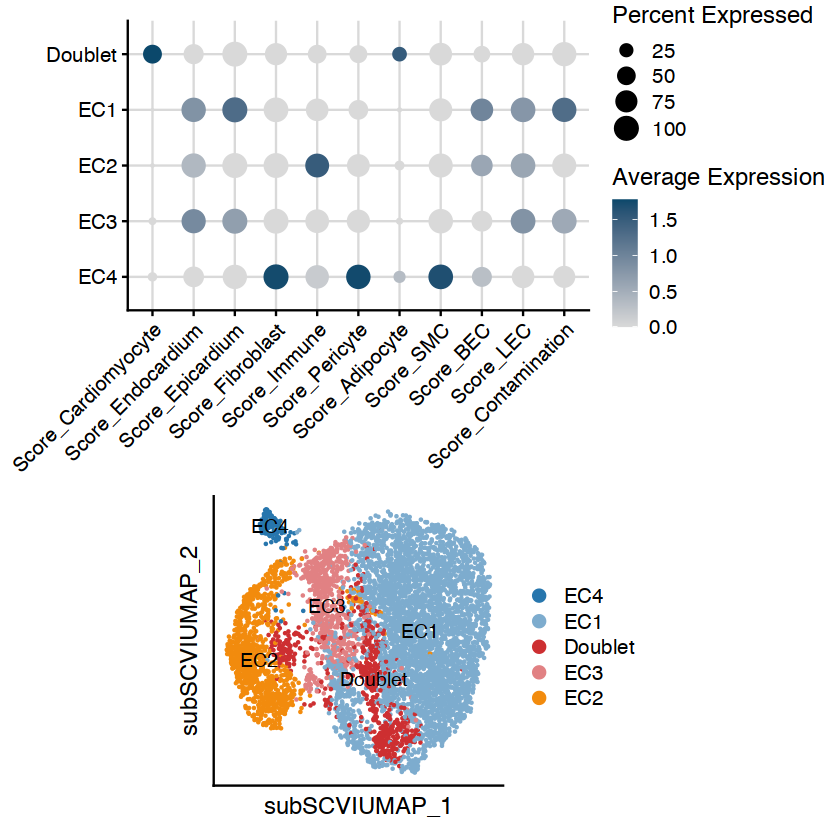

In [6]:
## Re-annotate
#Idents(sub.srt) <- 'RNA_snn_res.0.2'

sub.srt$Cell_state <- NA

sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(0)] <- 'EC1'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(1)] <- 'EC2'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(2)] <- 'Doublet'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(3)] <- 'EC3'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.2 %in% c(4)] <- 'EC4'


Idents(sub.srt) <- 'Cell_state'
DotPlot2(sub.srt, features = paste0('Score_', levels(sub.srt$Cell_type)), group.by = 'Cell_state', col.min = 0) /
        DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = mycol_20)

In [7]:
gl <- Table(srt$Cell_type)
p <- FeaturePlot2(sub.srt, features = paste0('Score_', names(gl)), raster = T, min.cutoff = 0, max.cutoff = 4, ncol = 5)
PlotPDF('1.4.feat.cell_type_score', 30, 20)
p
dev.off()

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: Score_Doublet"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will 

pdf 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`




Doublet     EC1     EC2     EC3     EC4 
    670    4175    1022     653     145 

pdf 
  2

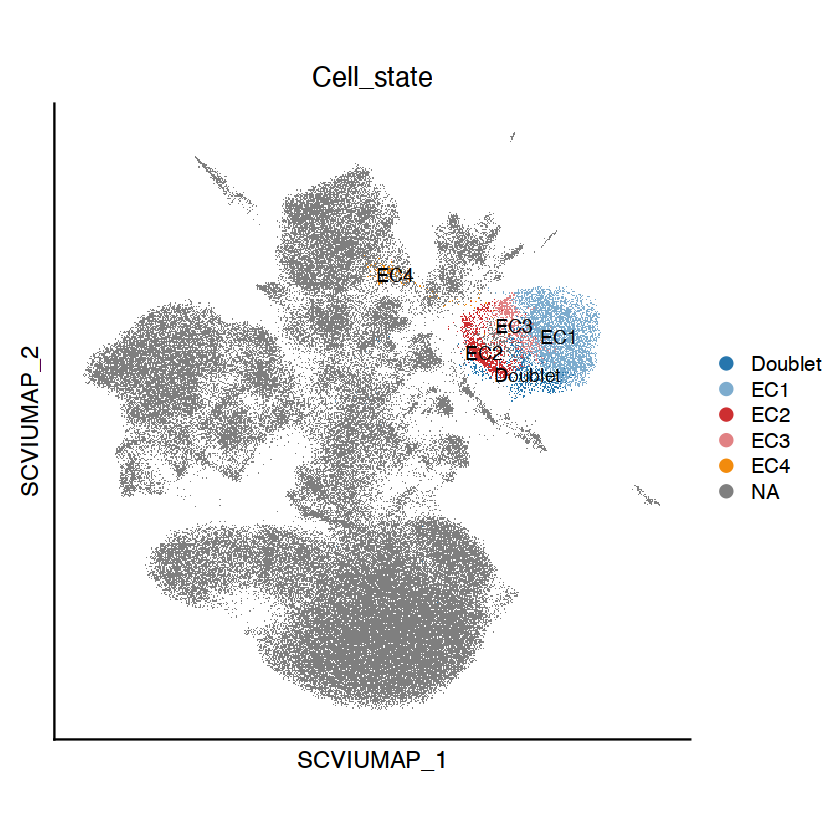

In [8]:
srt$Cell_state <- NA
srt$Cell_state[Cells(sub.srt)] <- sub.srt$Cell_state
DimPlot2(srt, reduction = 'scVI_umap', label = T, cols = mycol_20, group.by = 'Cell_state')

Table(sub.srt$Cell_state)


sub.srt$Cell_state <- factor(sub.srt$Cell_state, levels = c(
        'EC1',
        'EC2',
        'EC3',
        'EC4',
        'Doublet'
))
Idents(sub.srt) <- 'Cell_state'
  
PlotPDF('2.dim.all_cluster_annotated', 8, 8)
DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state')
dev.off()

In [9]:
mk <- FindAllMarkers(sub.srt, only.pos = T, return.thresh = 0.01, logfc.threshold = 0.25)
mk <- mk[mk$p_val_adj < 0.01, ]
p <- MarkerHeatmap(sub.srt, mk, n_cells = 500, top = 10)
PlotPDF('3.heat.maker_all_cluster', 15, 15)
p
dev.off()

WriteCSV(mk, title = 'cell_subtype_markers')

Calculating cluster EC1

Calculating cluster EC2

Calculating cluster EC3

Calculating cluster EC4

Calculating cluster Doublet

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


pdf 
  2

In [10]:
## Re-embed without ambiguous cells
fb.srt <- sub.srt
fb.srt2 <- fb.srt[, fb.srt$Cell_state != 'Doublet']
fb.srt2 <- RunUMAP(fb.srt2, reduction = 'scVI', dims = 1:50, min.dist = 0.5,
                   reduction.name = 'sub_clean_scVI_umap', reduction.key = 'subcleanSCVIUMAP_', verbose = FALSE)
fb.srt@reductions$sub_clean_scVI_umap <- fb.srt@reductions$sub_scVI_umap
fb.srt@reductions$sub_clean_scVI_umap@cell.embeddings[, c(1,2)] <- NA
fb.srt@reductions$sub_clean_scVI_umap@cell.embeddings[Cells(fb.srt2), c(1,2)] <-
        fb.srt2@reductions$sub_clean_scVI_umap@cell.embeddings
colnames(fb.srt@reductions$sub_clean_scVI_umap@cell.embeddings) <-
        colnames(fb.srt2@reductions$sub_clean_scVI_umap@cell.embeddings)
fb.srt@reductions$sub_clean_scVI_umap@key <- fb.srt2@reductions$sub_clean_scVI_umap@key
PlotPDF('4.umap.Re_embed_annotated_reembed', 6, 6)
DimPlot2(fb.srt, reduction = 'sub_clean_scVI_umap', group.by = 'Cell_state', cols = mycol_10,  label = T)
dev.off()
sub.srt <- fb.srt

Warning message:
"Removed 670 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_text()`)."


pdf 
  2

In [11]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
saveRDS(sub.srt, 'integrated/PART14.epicar_cells.srt.rds')

In [12]:
sub.srt <- DietSeurat(sub.srt, dimreducs = 'sub_scVI_umap', assay = 'RNA')
SaveH5ad(sub.srt, path = 'integrated/', name = 'PART14.annotated_epicar.gex.ann',
         assay = 'RNA', raw_count_only = T, verbose = T)

## Following code is for avoiding "_index" in adata.var bug
suppressMessages(library('anndata'))
adata <- read_h5ad('integrated/PART14.annotated_epicar.gex.ann.h5ad')
adata$raw <- NULL
adata$write_h5ad(filename = 'integrated/PART14.annotated_epicar.gex.ann.h5ad') ## replace the original
adata$X[1:10, 1:20]
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Raw matrix:



20 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names '2023_NeoC3KO_RLi:P01_S001:TGTTTGTAGAATCTAG-1', '2023_NeoC3KO_RLi:P01_S001:AACGGGAGTACCCAGC-1', '2023_NeoC3KO_RLi:P01_S001:CATTCTAAGACCAAAT-1' ... ]]



                                 
Xkr4          . 2 . 4 . . . . 4 .
Gm1992        . . . . . . . . . .
Gm19938       . . . . . . . . . .
Gm37381       . . . . . . . . . .
Rp1           . . . . . . . . . .
Sox17         . . . . . . . . . .
Gm37587       . . . . . . . . . .
Gm37323       . . . . . . . . . .
Mrpl15        . . . . . 2 . . . .
Lypla1        . . . . . . . 2 . 1
Tcea1         . 2 2 . . 2 1 1 . 1
Rgs20         . . . . . . . . . .
Atp6v1h       . 1 2 1 1 2 . 2 . .
Rb1cc1        . 1 3 . 3 1 3 1 4 2
4732440D04Rik . . . . . 3 . 2 . .
Alkal1        . . . . . . . . . .
St18          . . . . . . . . . .
Pcmtd1        . 1 3 1 1 1 . 1 1 5
Gm26901       . . . 1 . . . . . .
Gm30414       . . . . . . . . . .


Data matrix:



20 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names '2023_NeoC3KO_RLi:P01_S001:TGTTTGTAGAATCTAG-1', '2023_NeoC3KO_RLi:P01_S001:AACGGGAGTACCCAGC-1', '2023_NeoC3KO_RLi:P01_S001:CATTCTAAGACCAAAT-1' ... ]]



                                 
Xkr4          . 2 . 4 . . . . 4 .
Gm1992        . . . . . . . . . .
Gm19938       . . . . . . . . . .
Gm37381       . . . . . . . . . .
Rp1           . . . . . . . . . .
Sox17         . . . . . . . . . .
Gm37587       . . . . . . . . . .
Gm37323       . . . . . . . . . .
Mrpl15        . . . . . 2 . . . .
Lypla1        . . . . . . . 2 . 1
Tcea1         . 2 2 . . 2 1 1 . 1
Rgs20         . . . . . . . . . .
Atp6v1h       . 1 2 1 1 2 . 2 . .
Rb1cc1        . 1 3 . 3 1 3 1 4 2
4732440D04Rik . . . . . 3 . 2 . .
Alkal1        . . . . . . . . . .
St18          . . . . . . . . . .
Pcmtd1        . 1 3 1 1 1 . 1 1 5
Gm26901       . . . 1 . . . . . .
Gm30414       . . . . . . . . . .


Scaled Data matrix:

No scaled data slot

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

Adding variable features for RNA

Adding feature-level metadata for RNA

Adding cell embeddings for sub_scVI_umap

No loadings for sub_scVI_umap

No projected loadings for sub_scVI_umap

No standard deviations for sub_scVI_umap

No JackStraw data for sub_scVI_umap

Validating h5Seurat file

Adding data from RNA as X

Transfering meta.features to var

Adding counts from RNA as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

Adding dimensional reduction information for sub_scVI_umap



None

  [[ suppressing 20 column names 'Xkr4', 'Gm1992', 'Gm19938' ... ]]



10 x 20 sparse Matrix of class "dgTMatrix"
                                                                              
2023_NeoC3KO_RLi:P01_S001:TGTTTGTAGAATCTAG-1 . . . . . . . . . . . . . . . . .
2023_NeoC3KO_RLi:P01_S001:AACGGGAGTACCCAGC-1 2 . . . . . . . . . 2 . 1 1 . . .
2023_NeoC3KO_RLi:P01_S001:CATTCTAAGACCAAAT-1 . . . . . . . . . . 2 . 2 3 . . .
2023_NeoC3KO_RLi:P01_S001:ACTATGGGTACCTTCC-1 4 . . . . . . . . . . . 1 . . . .
2023_NeoC3KO_RLi:P01_S001:TCCAGAACATTGCCGG-1 . . . . . . . . . . . . 1 3 . . .
2023_NeoC3KO_RLi:P01_S001:AGAAGTAGTACCCACG-1 . . . . . . . . 2 . 2 . 2 1 3 . .
2023_NeoC3KO_RLi:P01_S001:GGTCTGGAGTAGTGCG-1 . . . . . . . . . . 1 . . 3 . . .
2023_NeoC3KO_RLi:P01_S001:TCAGTCCCAGCGGTTC-1 . . . . . . . . . 2 1 . 2 1 2 . .
2023_NeoC3KO_RLi:P01_S001:TCTGTCGCACACCTGG-1 4 . . . . . . . . . . . . 4 . . .
2023_NeoC3KO_RLi:P01_S001:TCACTATAGCGACTGA-1 . . . . . . . . . 1 1 . . 2 . . .
                                                  
2023_NeoC3KO_RLi:P01_S001:TGTTTGTAGAA

In [13]:
sub.srt <- readRDS(file = 'integrated/PART14.epicar_cells.srt.rds')
sub.srt <- sub.srt[, !sub.srt$Cell_state %in% c('Doublet')]

In [14]:
PlotPDF('4.1.0.bar.annotated_composition', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'Cell_state', stack.var = 'group1', percentage = T)
dev.off()

`summarise()` has grouped output by 'group1'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 31 × 3
# Groups:   StackVar [8]
   StackVar GroupVar Count
   <fct>    <fct>    <int>
 1 wt_p2m1  EC1       1069
 2 wt_p2m1  EC2        362
 3 wt_p2m1  EC3        280
 4 wt_p2m1  EC4         60
 5 wt_p2m2  EC1        408
 6 wt_p2m2  EC2        178
 7 wt_p2m2  EC3         33
 8 wt_p2m2  EC4         15
 9 wt_p2s1  EC1        439
10 wt_p2s1  EC2         19
# … with 21 more rows


pdf 
  2

In [15]:
PlotPDF('4.2.dim.all_cluster_annotated', 16, 8)
DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state',split.by = 'group2')
dev.off()

pdf 
  2

In [16]:
PlotPDF('4.1.1.bar.annotated_composition', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'group1', stack.var = 'Cell_state', percentage = T)
dev.off()

`summarise()` has grouped output by 'Cell_state'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 31 × 3
# Groups:   StackVar [4]
   StackVar GroupVar Count
   <fct>    <fct>    <int>
 1 EC1      wt_p2m1   1069
 2 EC1      wt_p2m2    408
 3 EC1      wt_p2s1    439
 4 EC1      wt_p2s2    377
 5 EC1      c3_p2m1    533
 6 EC1      c3_p2m2    242
 7 EC1      c3_p2s1    847
 8 EC1      c3_p2s2    260
 9 EC2      wt_p2m1    362
10 EC2      wt_p2m2    178
# … with 21 more rows


pdf 
  2

In [17]:
PlotPDF('4.1.2.bar.annotated_composition', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'group2', stack.var = 'Cell_state', percentage = T)
dev.off()

`summarise()` has grouped output by 'Cell_state'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 16 × 3
# Groups:   StackVar [4]
   StackVar GroupVar Count
   <fct>    <fct>    <int>
 1 EC1      wt_p2m    1477
 2 EC1      wt_p2s     816
 3 EC1      c3_p2m     775
 4 EC1      c3_p2s    1107
 5 EC2      wt_p2m     540
 6 EC2      wt_p2s      73
 7 EC2      c3_p2m     224
 8 EC2      c3_p2s     185
 9 EC3      wt_p2m     313
10 EC3      wt_p2s      41
11 EC3      c3_p2m     169
12 EC3      c3_p2s     130
13 EC4      wt_p2m      75
14 EC4      wt_p2s       3
15 EC4      c3_p2m      66
16 EC4      c3_p2s       1


pdf 
  2

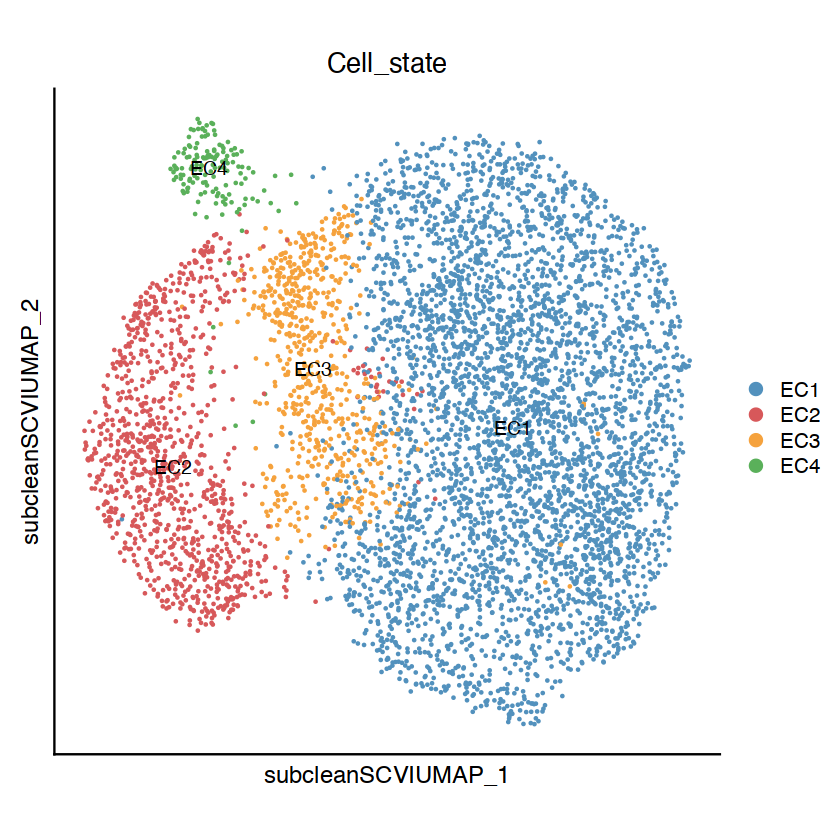

In [18]:
DimPlot2(sub.srt, reduction = 'sub_clean_scVI_umap', group.by = 'Cell_state', cols = mycol_10,  label = T)

In [19]:
PlotPDF('4.4.dim.all_cluster_annotated', 16, 8)
DimPlot2(sub.srt, reduction = 'sub_clean_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state',split.by = 'group2')
dev.off()

pdf 
  2